In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns
import scipy.stats as st

%matplotlib inline

In [2]:
cd ..

/home/jovyan/UCLA_CSX_450_2_Final


In [3]:
%run src/load_data.py

In [4]:
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,None,None,None,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,None,None,None,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,None,None,None,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [5]:
housing_df.describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1451.0,70.031592,22.040937,21.0,60.0,70.049958,79.0,313.0
LotArea,1451.0,10507.808408,9992.987081,1300.0,7537.5,9477.000000,11600.0,215245.0
YearBuilt,1451.0,1971.092350,30.190266,1872.0,1954.0,1972.000000,2000.0,2010.0
YearRemodAdd,1451.0,1984.760165,20.651334,1950.0,1966.0,1993.000000,2004.0,2010.0
MasVnrArea,1451.0,103.756720,181.108150,0.0,0.0,0.000000,166.0,1600.0
BsmtFinSF1,1451.0,442.274983,455.369276,0.0,0.0,381.000000,707.0,5644.0
BsmtFinSF2,1451.0,46.838043,161.777324,0.0,0.0,0.000000,0.0,1474.0
BsmtUnfSF,1451.0,567.197105,442.209192,0.0,222.0,479.000000,808.0,2336.0
TotalBsmtSF,1451.0,1056.310131,437.914609,0.0,795.0,991.000000,1297.5,6110.0
FirstFlrSF,1451.0,1161.551344,385.002532,334.0,882.0,1086.000000,1391.0,4692.0


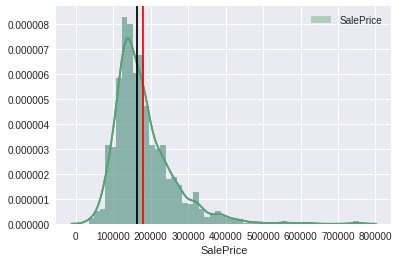

In [16]:
ax = sns.distplot(housing_df['SalePrice'])
sns.distplot(housing_df['SalePrice'], label='SalePrice')
plt.axvline(housing_df['SalePrice'].mean(), c='red')
plt.axvline(housing_df['SalePrice'].median(), c='black')
plt.legend()

In [10]:
YearBuilt = housing_df['YearBuilt'].values
_, deciles = pd.qcut(housing_df['YearBuilt'], 10, retbins=True)

In [11]:
YearBuilt = housing_df['YearBuilt'].copy()
YearBuilt[YearBuilt < deciles[1]] = 0
YearBuilt[YearBuilt >= deciles[9]] = 9
for i in range(1,9):
    YearBuilt[(YearBuilt >= deciles[i]) & (YearBuilt < deciles[i+1])] = i
housing_df['YearBuilt'] = YearBuilt.astype('str')

In [12]:
housing_df['YearBuilt'].unique()

array(['8', '5', '7', '0', '6', '1', '4', '3', '9', '2'], dtype=object)

In [14]:
SalePrice = housing_df['SalePrice'].values
_, deciles = pd.qcut(housing_df['SalePrice'], 10, retbins=True)

array([  34900.,  106250.,  124000.,  135000.,  147000.,  162500.,
        179000.,  197900.,  230000.,  278000.,  755000.])

In [22]:
SalePrice = housing_df['SalePrice'].copy()
SalePrice[SalePrice < deciles[1]] = 0
SalePrice[SalePrice >= deciles[9]] = 9
for i in range(1,9):
    SalePrice[(SalePrice >= deciles[i]) & (SalePrice < deciles[i+1])] = i

housing_df['SalePrice'] = SalePrice.astype('str')

In [23]:
housing_df['SalePrice'].unique()

array(['7', '6', '3', '8', '9', '2', '1', '4', '0', '5'], dtype=object)

In [31]:
pd.crosstab(housing_df['YearBuilt'], housing_df['SalePrice'], normalize='index')

SalePrice,0,1,2,3,4,5,6,7,8,9
YearBuilt,,,,,,,,,,
0,0.294964,0.201439,0.107914,0.122302,0.071942,0.057554,0.043165,0.043165,0.035971,0.021583
1,0.310811,0.216216,0.114865,0.108108,0.060811,0.060811,0.020270,0.027027,0.054054,0.027027
2,0.149660,0.231293,0.163265,0.197279,0.122449,0.061224,0.006803,0.034014,0.034014,0.000000
3,0.030534,0.091603,0.175573,0.259542,0.190840,0.160305,0.045802,0.007634,0.022901,0.015267
4,0.142857,0.135714,0.135714,0.150000,0.150000,0.078571,0.085714,0.057143,0.050000,0.014286
5,0.061350,0.092025,0.147239,0.134969,0.177914,0.104294,0.134969,0.061350,0.042945,0.042945
6,0.007194,0.028777,0.028777,0.050360,0.050360,0.165468,0.179856,0.136691,0.179856,0.172662
7,0.000000,0.000000,0.007752,0.000000,0.031008,0.139535,0.193798,0.294574,0.209302,0.124031
8,0.000000,0.000000,0.024691,0.080247,0.092593,0.117284,0.185185,0.154321,0.154321,0.191358
